In [156]:
import pandas as pd
import missingno as msno
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from haversine import haversine, Unit

pd.set_option('display.max_columns', None)

In [157]:
df_all_housing_info = pd.read_csv('data/eda.csv')
df_all_housing_info.shape

(21597, 21)

In [158]:
df_filtered =df_all_housing_info.query(' sqft_lot >10000 and yr_built < 1930 and waterfront !=1.0')
df_filtered_with_4_bth = df_all_housing_info.query('bathrooms>4 and sqft_lot >10000 and yr_built < 1930 and waterfront !=1.0')

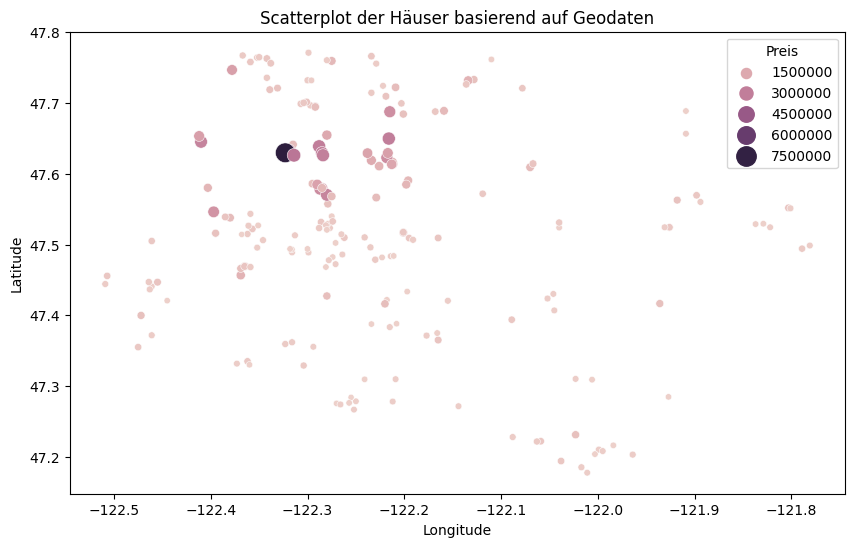

In [159]:
gdf = gpd.GeoDataFrame(
    df_filtered  , 
    geometry=gpd.points_from_xy(df_filtered['long'], df_filtered['lat'])
)

# Scatterplot mit Geodaten
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='price', size='price', sizes=(20, 200), data=df_filtered)
plt.title('Scatterplot der Häuser basierend auf Geodaten')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Preis')
plt.show()

In [160]:
test=df_all_housing_info[['lat','long']]
test.iloc[1,[0,1]]

en=(lat1, lon1) = test.iloc[0, [0, 1]]  # Zeile 0, Spalten lat und long
en2=(lat2, lon2) = test.iloc[1, [0, 1]]  # Zeile 1, Spalten lat und long
haversine(en,en2)


23.78710964753959

In [161]:

house_id_list = df_filtered.id.tolist()
rsdf = pd.DataFrame(columns=house_id_list)
rsdf

,114101516,1952200240,4389200955,257000138,7994700030,7520000520,7520000520,325059171,3348401740,9429500045,8856004730,3324069070,1624079051,922069139,133000135,5266300140,1020069017,1823059205,625059051,2143700830,2143700830,3398800055,6893300350,3225069239,8018600640,1926059155,2320069083,6893300295,2346800270,3034200197,8572900135,3520069033,1820069019,9808100100,1720069006,2420069251,3123039089,3356403820,5700003640,622059019,8550001515,5482700100,3840700600,622059031,5700003585,1105000745,522079067,2724049076,3223039013,2124700015,114100745,7635801311,1926059027,6447300345,844000425,7635801350,537000130,1524079088,2122059127,5249800010,2822059181,3224079005,7276100020,3123039136,5652600185,1024039001,3401700185,8069000216,6762700020,2525049133,5652601075,943100220,7287100035,40000553,2722059013,5652600065,7899800905,9218400088,4463400195,4389201021,121039042,4019300155,9194101388,2613200025,1245003160,8655900100,1498303700,8143600015,2523039054,3523029077,3323069045,6738700335,322059264,7818900060,4319200060,4167100240,5249802085,3034200516,7283900036,1822039225,625100004,3073500045,5700004485,8570900023,1069000070,1118000340,2623029078,3343903240,8856001090,4022900951,2568300210,4006000281,3758900150,853200040,7663700531,3025059072,3751604895,126059021,2853600155,3262300322,126039213,4356200120,3343901848,1443500925,2481630180,1822069052,423059077,2346800180,623049047,2024089011,3021059197,5035300325,524059052,3751606606,5111400081,6102400166,5316101075,121039038,3521059042,1822059057,8887001215,2320069107,1720069029,7635801371,629000704,9485700175,8018600880,3342103282,522039106,3353400840,3304700130,1320069249,3022039069,7849200635,2172000285,4021100095,3342103281,257000263,8653600050,2824069180,192700080,4389200876,16000545,5643600351,2124089028,7935000280,7200080,1826049430,7200179,7200179,3438501700,3888100029,7606200275,4217401365,8018600980,3326079016,3404700080,6146600185,6623400050,1871400585,7347600490,4006000423,1922059401,8072000035,3810000843,3322049095,9537200037,7635800600,3241600027,5317100750,2820069048,8024202380,1346300150,9536601295,4317700085,3123039042,239000155,7663700401,5101405338,7972602490,2720069019,42000245


In [162]:
house_id_list = df_filtered.id.tolist()
sm_house_list= []
rsdf = {f"{id}": [] for id in house_id_list}
df_4_baths= df_all_housing_info[df_all_housing_info.bathrooms >4]

for i, row1 in df_filtered.iterrows():
    same_zip = df_4_baths[df_4_baths.zipcode ==row1.zipcode]
    for j,row2 in same_zip.iterrows():
        if haversine((row1.lat, row1.long),(row2.lat,row2.long))<10 :
            rsdf[f"{row1.id}"].append(row2.id)
            print(haversine((row1.lat, row1.long),(row2.lat,row2.long)))
            sm_house_list.append(row2.id)





0.5452210306807469
2.131773149009892
1.4324330538357377
1.176194896133365
3.99471557328281
2.0852521463411398
1.1476236140923144
3.3559354903756122
0.7783655616341161
1.0790449236141735
2.3366372215216273
8.049430976429823
0.9387256068772316
1.760358421547312
2.1226520101475836
2.0788378841582866
1.1398098763783207
2.539717394048285
1.1661039940065683
2.441855736788053
2.0025871997779063
2.7525980926800755
2.655423851667137
3.020572462145961
2.0069965837566235
2.001353097399554
4.129709451097768
2.2683555306626255
3.4544467645192722
3.561582740252241
5.447360004510254
3.96980230532402
3.6859042545450444
4.148778985382499
4.202520380194567
4.118074490870864
4.999773444485014
2.2310115591868325
3.1464972190398215
2.1756818159737565
2.67889237923535
6.391636449326028
2.410382906307957
2.8636224226558107
2.8443965464879044
2.398757825373412
3.2452121743948164
2.4979521218149894
5.260066051334065
2.1650077851901735
3.417718025124806
3.1876920348468514
2.312623986375707
3.766012762761053
2.4

In [163]:
cand_list
close_df =df_all_housing_info[df_all_housing_info.id.isin(sm_house_list)]
close_df['group']=1
df_filtered['group']=2


/tmp/ipykernel_39295/485495706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df['group']=1
/tmp/ipykernel_39295/485495706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['group']=2


In [164]:
#print(rsdf)
rsdf2 = {key:rsdf[key]  for key in rsdf if rsdf[key]!=[]}
print(rsdf2)
#combined_df=pd.concat([close_df,df_filtered])
combined_df2=pd.concat([close_df,df_filtered])
combined_df = combined_df2[(combined_df2.group ==2 & combined_df2.id.isin(rsdf2.keys())) | combined_df2.group ==1]
# combined_df2
# combined_df=df_filtered


{'114101516': [7018000560, 6708200320], '1952200240': [6762700020], '4389200955': [8907500070, 9808700762, 685000115, 853200010, 644200040, 7768700300, 5078400160, 249000180, 627300145, 5536100005, 3025059093, 2025059131, 8084900160, 5078400215, 250000090, 5710000005, 8085400401, 524059063], '257000138': [42000130], '7994700030': [7851980100, 7851990120, 7853280350, 7853280370], '325059171': [1247600105, 3886901795, 1245002391, 3758900220, 1725059136, 3885803044, 3758900075, 4100500070, 856000195, 856000635, 1725059127], '9429500045': [4139420370, 2624059036, 4139500200, 3377900195, 3343301910, 4139500080, 713500020, 2424059052, 4139500410, 3303850390, 4139460390, 6065300370, 4139450760, 7856410411, 8089510170, 4139420190, 715010130, 2205700470, 6072800246, 4139900120, 1778360150, 2424059170], '3324069070': [2024069008, 8562750220, 2923500230, 2616800600, 5561301220, 8562710250, 2524069097], '1624079051': [8678500060, 3225079035, 1824079073, 1524079188, 7853440050], '922069139': [82206

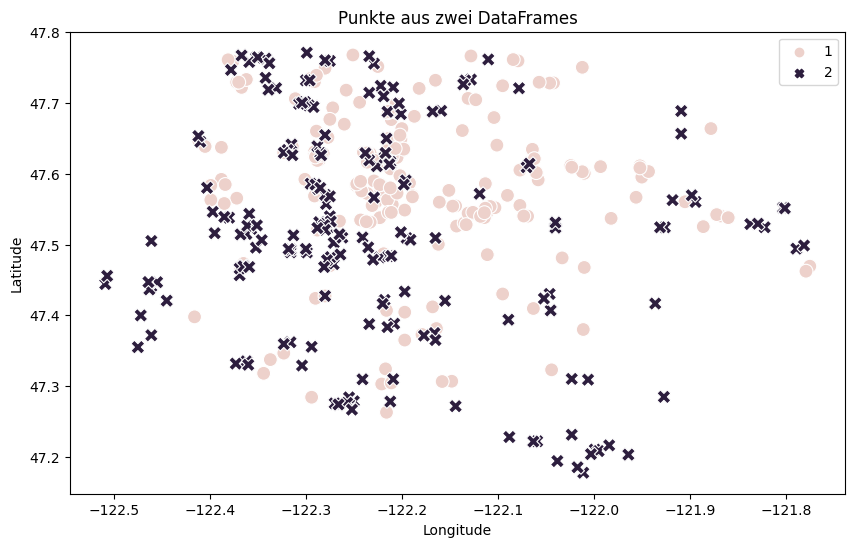

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='long', y='lat', hue='group', style='group', s=100)
plt.title('Punkte aus zwei DataFrames')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()